In [17]:
# Importing the usual libraries

import pandas as pd
import numpy as np

import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import scipy.stats as stats

In [2]:
# Import data file

df = pd.read_excel("IBM Employee Attrition.xlsx")

# Display all columns
pd.set_option('display.max_columns', None)

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [3]:
# Check to see what type of data, how much data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [4]:
# Look for duplicate rows

df.loc[df.duplicated()]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [5]:
# Find descriptive statistics, see if any fake info

df.describe()

# All looks good: categorical variables have appropriate min and max values, according to the scale given

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# DATA CLEANING

In [55]:
# Create a new copy of the dataset before removing outliers

df3 = df.copy()

In [57]:
# Use z-scores to find and remove outliers

# 1. create a new column with z-scores for monthly income

df3["zscoreMnthInc"] = np.abs(stats.zscore(df3["MonthlyIncome"]))

# Find the z-score outliers

outMnthInc = df3.loc[df3["zscoreMnthInc"]>3].index

print(outMnthInc)

# no outliers

Int64Index([], dtype='int64')


In [22]:
#To drop the outliers
## df3.drop(np.abs(stats.zscore(df3["MonthlyIncome"])) > 3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscoreMnthInc


In [58]:
# 2. create a new column with z-scores for number of companies worked

df3["zscoreNumCompWorked"] = np.abs(stats.zscore(df3["NumCompaniesWorked"]))

# Find the z-score outliers

outNumCompWorked = df3.loc[df3["zscoreNumCompWorked"]>3].index

print(outNumCompWorked)

# no outliers

Int64Index([], dtype='int64')


In [59]:
# 3. create a new column with z-scores for total working years

df3["zscoreTotWorkYrs"] = np.abs(stats.zscore(df3["TotalWorkingYears"]))

# Find the z-score outliers

outTotWorkYrs = df3.loc[df3["zscoreTotWorkYrs"]>3].index

print(outTotWorkYrs)

# several outliers

Int64Index([  85,   98,  126,  187,  270,  401,  445,  595,  624,  894,  956,
            1043, 1116, 1184, 1301, 1401],
           dtype='int64')


In [60]:
# Remove outliers based on total working years from dataset

df3 = df3.drop(outTotWorkYrs)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1454 non-null   int64  
 1   Attrition                 1454 non-null   object 
 2   BusinessTravel            1454 non-null   object 
 3   Department                1454 non-null   object 
 4   DistanceFromHome          1454 non-null   int64  
 5   Education                 1454 non-null   int64  
 6   EducationField            1454 non-null   object 
 7   EmployeeNumber            1454 non-null   int64  
 8   EnvironmentSatisfaction   1454 non-null   int64  
 9   Gender                    1454 non-null   object 
 10  JobInvolvement            1454 non-null   int64  
 11  JobLevel                  1454 non-null   int64  
 12  JobRole                   1454 non-null   object 
 13  JobSatisfaction           1454 non-null   int64  
 14  MaritalS

In [61]:
# 4. create a new column with z-scores for training times last year

df3["zscoreTrainTimesLastYear"] = np.abs(stats.zscore(df3["TrainingTimesLastYear"]))

# Find the z-score outliers

outTrainTimesLastYear = df3.loc[df3["zscoreTrainTimesLastYear"]>3].index

print(outTrainTimesLastYear)

# no outliers

Int64Index([], dtype='int64')


In [63]:
# 5. create a new column with z-scores for years at company

df3["zscoreYearsAtCompany"] = np.abs(stats.zscore(df3["YearsAtCompany"]))

# Find the z-score outliers

outYearsAtCompany = df3.loc[df3["zscoreYearsAtCompany"]>3].index

print(outYearsAtCompany)

# several outliers

Int64Index([  18,   62,  119,  190,  237,  390,  411,  425,  473,  477,  561,
             592,  653,  677,  749,  861,  914,  918,  922,  962, 1086, 1111,
            1135, 1138],
           dtype='int64')


In [64]:
# Remove outliers based on years at company from dataset

df3 = df3.drop(outYearsAtCompany)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1430 non-null   int64  
 1   Attrition                 1430 non-null   object 
 2   BusinessTravel            1430 non-null   object 
 3   Department                1430 non-null   object 
 4   DistanceFromHome          1430 non-null   int64  
 5   Education                 1430 non-null   int64  
 6   EducationField            1430 non-null   object 
 7   EmployeeNumber            1430 non-null   int64  
 8   EnvironmentSatisfaction   1430 non-null   int64  
 9   Gender                    1430 non-null   object 
 10  JobInvolvement            1430 non-null   int64  
 11  JobLevel                  1430 non-null   int64  
 12  JobRole                   1430 non-null   object 
 13  JobSatisfaction           1430 non-null   int64  
 14  MaritalS

In [65]:
# 6. create a new column with z-scores for years in current role

df3["zscoreYearsCurrRole"] = np.abs(stats.zscore(df3["YearsInCurrentRole"]))

# Find the z-score outliers

outYearsCurrRole = df3.loc[df3["zscoreYearsCurrRole"]>3].index

print(outYearsCurrRole)

# several outliers

Int64Index([  45,   63,  123,  231,  281,  417,  466,  716,  746,  976, 1024,
            1150, 1156, 1221, 1327, 1351, 1430],
           dtype='int64')


In [66]:
# Remove outliers based on years in current role

df3 = df3.drop(outYearsCurrRole)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1413 non-null   int64  
 1   Attrition                 1413 non-null   object 
 2   BusinessTravel            1413 non-null   object 
 3   Department                1413 non-null   object 
 4   DistanceFromHome          1413 non-null   int64  
 5   Education                 1413 non-null   int64  
 6   EducationField            1413 non-null   object 
 7   EmployeeNumber            1413 non-null   int64  
 8   EnvironmentSatisfaction   1413 non-null   int64  
 9   Gender                    1413 non-null   object 
 10  JobInvolvement            1413 non-null   int64  
 11  JobLevel                  1413 non-null   int64  
 12  JobRole                   1413 non-null   object 
 13  JobSatisfaction           1413 non-null   int64  
 14  MaritalS

In [67]:
# 7. create a new column with z-scores for years since last promotion

df3["zscoreYearsLastPromo"] = np.abs(stats.zscore(df3["YearsSinceLastPromotion"]))

# Find the z-score outliers

outYearsLastPromo = df3.loc[df3["zscoreYearsLastPromo"]>3].index

print(outYearsLastPromo)

# several outliers

Int64Index([  64,   90,  110,  178,  194,  218,  251,  314,  319,  326,  386,
             427,  508,  526,  535,  544,  584,  695,  701,  738,  750,  752,
             785,  799,  813,  838,  875,  926,  937,  951,  978, 1008, 1078,
            1093, 1223, 1242, 1295, 1303, 1331, 1348, 1403, 1414, 1447],
           dtype='int64')


In [68]:
# Remove outliers based on years since last promotion

df3 = df3.drop(outYearsLastPromo)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1370 non-null   int64  
 1   Attrition                 1370 non-null   object 
 2   BusinessTravel            1370 non-null   object 
 3   Department                1370 non-null   object 
 4   DistanceFromHome          1370 non-null   int64  
 5   Education                 1370 non-null   int64  
 6   EducationField            1370 non-null   object 
 7   EmployeeNumber            1370 non-null   int64  
 8   EnvironmentSatisfaction   1370 non-null   int64  
 9   Gender                    1370 non-null   object 
 10  JobInvolvement            1370 non-null   int64  
 11  JobLevel                  1370 non-null   int64  
 12  JobRole                   1370 non-null   object 
 13  JobSatisfaction           1370 non-null   int64  
 14  MaritalS

In [69]:
# 8. create a new column with z-scores for years with current manager

df3["zscoreYearsCurrManag"] = np.abs(stats.zscore(df3["YearsWithCurrManager"]))

# Find the z-score outliers

outYearsCurrManag = df3.loc[df3["zscoreYearsCurrManag"]>3].index

print(outYearsCurrManag)

# several outliers

Int64Index([28, 153, 616, 635, 686, 1330, 1443], dtype='int64')


In [70]:
# Remove outliers based on years with current manager

df3 = df3.drop(outYearsCurrManag)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1363 non-null   int64  
 1   Attrition                 1363 non-null   object 
 2   BusinessTravel            1363 non-null   object 
 3   Department                1363 non-null   object 
 4   DistanceFromHome          1363 non-null   int64  
 5   Education                 1363 non-null   int64  
 6   EducationField            1363 non-null   object 
 7   EmployeeNumber            1363 non-null   int64  
 8   EnvironmentSatisfaction   1363 non-null   int64  
 9   Gender                    1363 non-null   object 
 10  JobInvolvement            1363 non-null   int64  
 11  JobLevel                  1363 non-null   int64  
 12  JobRole                   1363 non-null   object 
 13  JobSatisfaction           1363 non-null   int64  
 14  MaritalS

In [71]:
# 9. create a new column with z-scores for age

df3["zscoreAge"] = np.abs(stats.zscore(df3["Age"]))

# Find the z-score outliers

outAge = df3.loc[df3["zscoreAge"]>3].index

print(outAge)

# no outliers

Int64Index([], dtype='int64')


In [72]:
# 10. create a new column with z-scores for distance from home

df3["zscoreDistanceFromHome"] = np.abs(stats.zscore(df3["DistanceFromHome"]))

# Find the z-score outliers

outDistanceFromHome = df3.loc[df3["zscoreDistanceFromHome"]>3].index

print(outDistanceFromHome)

# no outliers

Int64Index([], dtype='int64')


# DATA ANALYSIS

In [73]:
# 1. AGE vs. Attrition WITH OUTLIERS
df["Age"].groupby(df["Attrition"]).mean()

## Younger employees leaving

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

In [74]:
# 1. AGE vs. Attrition
df3["Age"].groupby(df3["Attrition"]).mean()

## Younger employees leaving

Attrition
No     36.811620
Yes    33.048458
Name: Age, dtype: float64

In [139]:
# 1a. Age vs. Gender

df3["Age"].groupby(df3["Gender"]).mean()

Gender
Female    36.595941
Male      35.913520
Name: Age, dtype: float64

In [142]:
# 1b. Age vs. Department

df3["Age"].groupby(df3["Department"]).mean()

# younger people in sales dept.

Department
Human Resources           36.706897
Research & Development    36.418994
Sales                     35.600000
Name: Age, dtype: float64

In [144]:
# 1c. Age vs. Job Role

df3["Age"].groupby(df3["JobRole"]).mean()

JobRole
Healthcare Representative    39.224138
Human Resources              35.500000
Laboratory Technician        33.948819
Manager                      46.064516
Manufacturing Director       37.876812
Research Director            42.904762
Research Scientist           34.197232
Sales Executive              36.313725
Sales Representative         30.361446
Name: Age, dtype: float64

In [145]:
# 1d. Age vs. Job Level

df3["Age"].groupby(df3["JobLevel"]).mean()

# as job level increases, age increases

JobLevel
1    32.494444
2    36.555344
3    39.355670
4    47.390625
5    47.560976
Name: Age, dtype: float64

In [146]:
# 1e. Age vs. Job Involvement

df3["Age"].groupby(df3["JobInvolvement"]).mean()

# as job level increases, age increases

JobInvolvement
1    35.000000
2    35.653061
3    36.549815
4    35.984962
Name: Age, dtype: float64

In [76]:
# 2. DISTANCE from Home vs. Attrition WITH OUTLIERS
df["DistanceFromHome"].groupby(df["Attrition"]).mean()

## Employees who live farther leaving

Attrition
No      8.915653
Yes    10.632911
Name: DistanceFromHome, dtype: float64

In [77]:
# 2. DISTANCE from Home vs. Attrition
df3["DistanceFromHome"].groupby(df3["Attrition"]).mean()

## Employees who live farther leaving

Attrition
No      8.884683
Yes    10.744493
Name: DistanceFromHome, dtype: float64

In [78]:
# 3. Education Level vs. Attrition WITH OUTLIERS
df["Education"].groupby(df["Attrition"]).mean()


Attrition
No     2.927007
Yes    2.839662
Name: Education, dtype: float64

In [79]:
# 3. Education Level vs. Attrition
df3["Education"].groupby(df3["Attrition"]).mean()

## categorical - dig deeper

Attrition
No     2.908451
Yes    2.814978
Name: Education, dtype: float64

In [131]:
# 3. Education Level vs. Attrition

pd.crosstab(df3["Education"], df3["Attrition"], margins = True)

## lower education level much more likely to leave

Attrition,No,Yes,All
Education,,,
1,131,30,161
2,224,44,268
3,435,95,530
4,310,54,364
5,36,4,40
All,1136,227,1363


In [80]:
# 4. ENVIRONMENT Satisfaction vs. Attrition WITH OUTLIERS
df["EnvironmentSatisfaction"].groupby(df["Attrition"]).mean()

## Lower satisfaction leaving

Attrition
No     2.771290
Yes    2.464135
Name: EnvironmentSatisfaction, dtype: float64

In [81]:
# 4. ENVIRONMENT Satisfaction vs. Attrition
df3["EnvironmentSatisfaction"].groupby(df3["Attrition"]).mean()

## Lower satisfaction leaving - dig deeper

Attrition
No     2.785211
Yes    2.462555
Name: EnvironmentSatisfaction, dtype: float64

In [132]:
# 4. ENVIRONMENT Satisfaction vs. Attrition

pd.crosstab(df3["EnvironmentSatisfaction"], df3["Attrition"], margins = True)

## As environment satisfaction decreases, likelihood of leaving increases

Attrition,No,Yes,All
EnvironmentSatisfaction,,,
1,188,69,257
2,226,42,268
3,364,58,422
4,358,58,416
All,1136,227,1363


In [82]:
# 5. JOB INVOLVEMENT vs. Attrition WITH OUTLIERS
df["JobInvolvement"].groupby(df["Attrition"]).mean()

## Lower job involvement leaving

Attrition
No     2.770479
Yes    2.518987
Name: JobInvolvement, dtype: float64

In [83]:
# 5. JOB INVOLVEMENT vs. Attrition
df3["JobInvolvement"].groupby(df3["Attrition"]).mean()

## Lower job involvement leaving - dig deeper

Attrition
No     2.780810
Yes    2.519824
Name: JobInvolvement, dtype: float64

In [133]:
# 5. JOB INVOLVEMENT vs. Attrition

pd.crosstab(df3["JobInvolvement"], df3["Attrition"], margins = True)

## As job involvement decreases, likelihood of leaving increases

Attrition,No,Yes,All
JobInvolvement,,,
1,48,26,74
2,274,69,343
3,693,120,813
4,121,12,133
All,1136,227,1363


In [148]:
# 5a. JOB INVOLVEMENT vs. Job Role

pd.crosstab(df3["JobRole"], df3["JobInvolvement"], margins = True)

## No clear relationship

JobInvolvement,1,2,3,4,All
JobRole,,,,,
Healthcare Representative,7,31,63,15,116
Human Resources,3,14,30,5,52
Laboratory Technician,19,67,143,25,254
Manager,3,12,42,5,62
Manufacturing Director,7,37,82,12,138
Research Director,1,14,42,6,63
Research Scientist,11,71,172,35,289
Sales Executive,16,77,188,25,306
Sales Representative,7,20,51,5,83


Text(0.5, 1.0, 'Frequency of Job Involvement Level per Job Role')

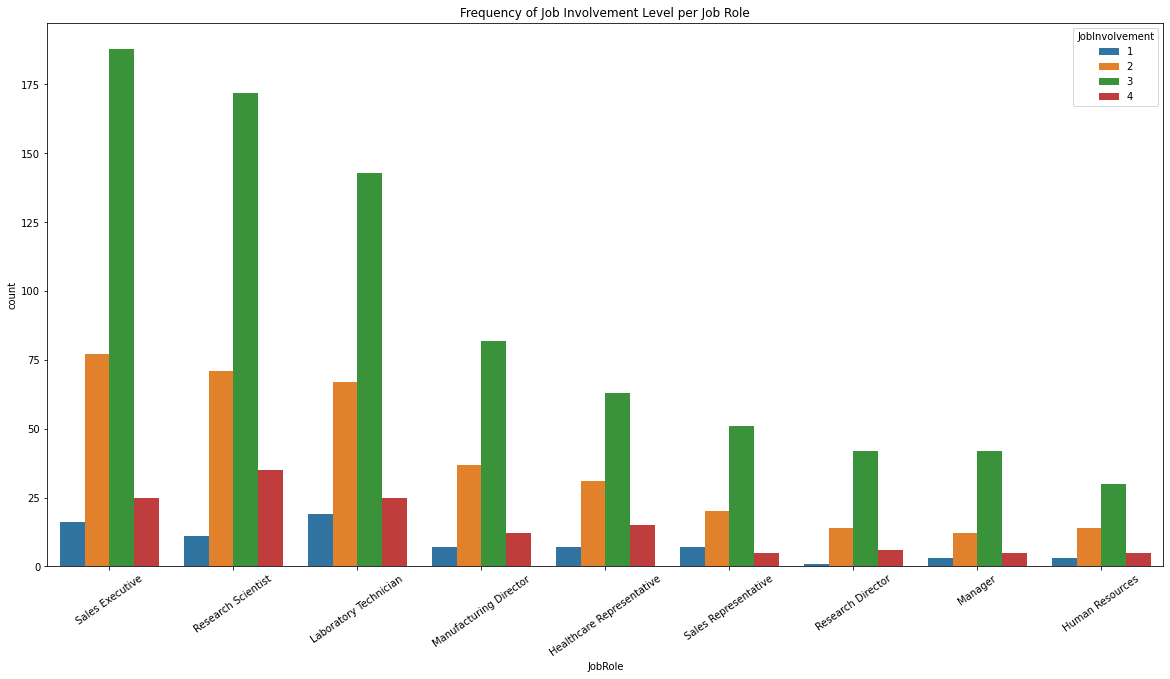

In [152]:
### create a count plot to show the number job involvement levels by job role 

plt.figure(figsize=(20,10))

sns.countplot(data = df3, x = "JobRole", hue = "JobInvolvement")

plt.xticks(rotation = 35)
plt.title('Frequency of Job Involvement Level per Job Role')

## No clear relationship

In [84]:
# 6. JOB LEVEL vs. Attrition WITH OUTLIERS
df["JobLevel"].groupby(df["Attrition"]).mean()

## Lower job level leaving

Attrition
No     2.145985
Yes    1.637131
Name: JobLevel, dtype: float64

In [85]:
# 6. JOB LEVEL vs. Attrition
df3["JobLevel"].groupby(df3["Attrition"]).mean()

## Lower job level leaving - dig deeper

Attrition
No     2.007042
Yes    1.546256
Name: JobLevel, dtype: float64

In [134]:
# 6. JOB LEVEL vs. Attrition

pd.crosstab(df3["JobLevel"], df3["Attrition"], margins = True)

## As job level decreases, likelihood of leaving increases

Attrition,No,Yes,All
JobLevel,,,
1,398,142,540
2,472,52,524
3,165,29,194
4,62,2,64
5,39,2,41
All,1136,227,1363


Text(0.5, 1.0, 'Frequency of Attrition per Job Role')

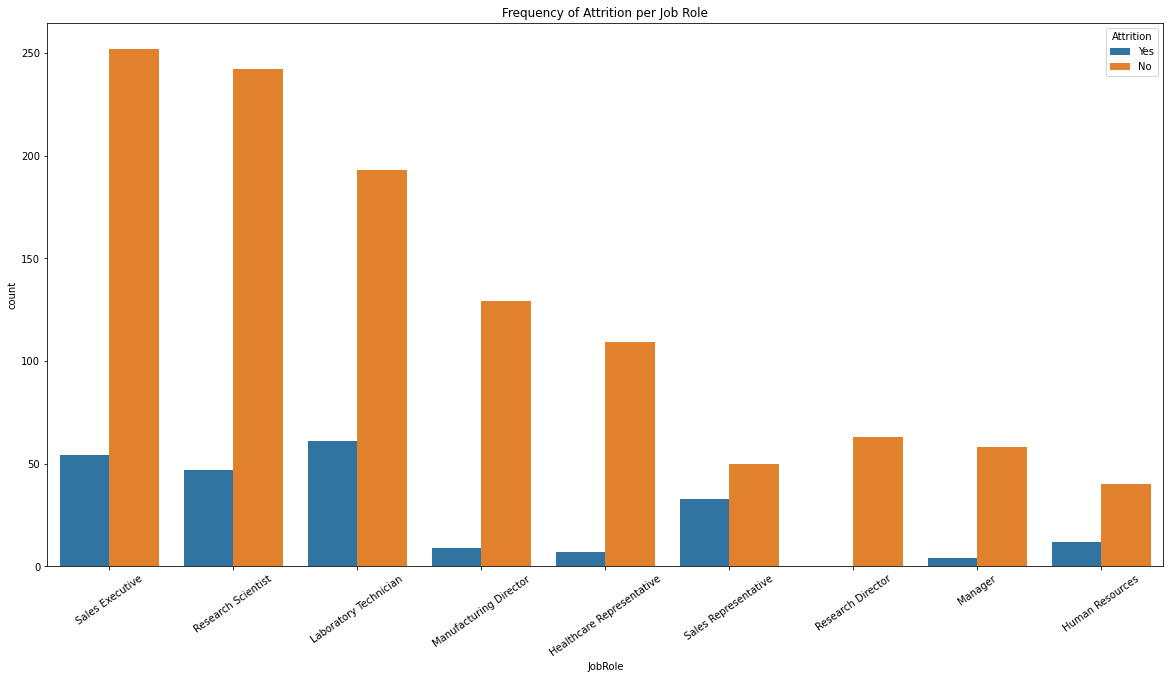

In [198]:
### count plot showing the job levels and attrition

plt.figure(figsize=(20,10))

sns.countplot(data = df3, x = "JobRole", hue = "Attrition")

plt.xticks(rotation = 35)
plt.title('Frequency of Attrition per Job Role')

## Sales, HR, Lab Techs, & Research Scientists have lowest job roles (highest frequencies of level 1)

In [154]:
# 6a. JOB LEVEL vs. Job Role

pd.crosstab(df3["JobRole"], df3["JobLevel"], margins = True)

## HR, Sales, Research Scientists, & Lab Techs have lowest job roles

JobLevel,1,2,3,4,5,All
JobRole,,,,,,
Healthcare Representative,0,76,35,5,0,116
Human Resources,33,13,6,0,0,52
Laboratory Technician,197,55,2,0,0,254
Manager,0,0,12,26,24,62
Manufacturing Director,0,90,40,8,0,138
Research Director,0,0,27,19,17,63
Research Scientist,234,54,1,0,0,289
Sales Executive,0,229,71,6,0,306
Sales Representative,76,7,0,0,0,83


Text(0.5, 1.0, 'Frequency of Job Level per Job Role')

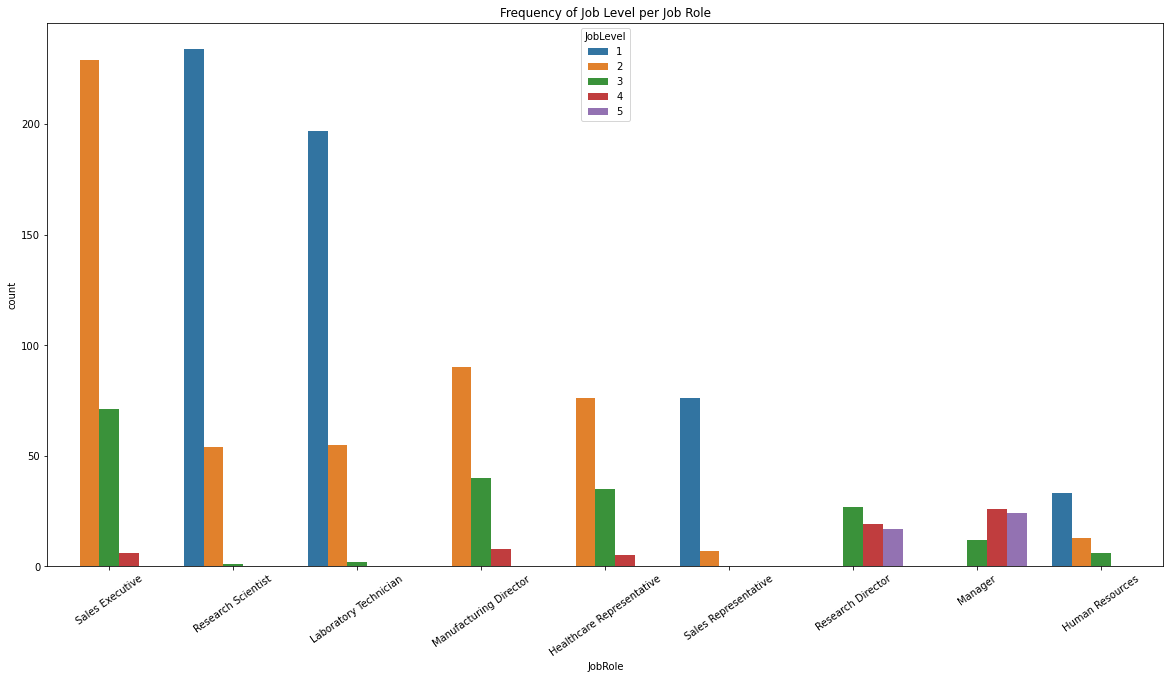

In [155]:
### count plot showing the job levels by job role 

plt.figure(figsize=(20,10))

sns.countplot(data = df3, x = "JobRole", hue = "JobLevel")

plt.xticks(rotation = 35)
plt.title('Frequency of Job Level per Job Role')

## Sales, HR, Lab Techs, & Research Scientists have lowest job roles (highest frequencies of level 1)

In [86]:
# 7. JOB SATISFACTION vs. Attrition WITH OUTLIERS
df["JobSatisfaction"].groupby(df["Attrition"]).mean()

## Lower job satisfaction leaving

Attrition
No     2.778589
Yes    2.468354
Name: JobSatisfaction, dtype: float64

In [87]:
# 7. JOB SATISFACTION vs. Attrition
df3["JobSatisfaction"].groupby(df3["Attrition"]).mean()

## Lower job satisfaction leaving - dig deeper

Attrition
No     2.794894
Yes    2.449339
Name: JobSatisfaction, dtype: float64

In [135]:
# 7. JOB SATISFACTION vs. Attrition

pd.crosstab(df3["JobSatisfaction"], df3["Attrition"], margins = True)

## As job level satisfaction, likelihood of leaving increases

Attrition,No,Yes,All
JobSatisfaction,,,
1,201,64,265
2,213,45,258
3,340,70,410
4,382,48,430
All,1136,227,1363


In [161]:
# 7a. JOB SATISFACTION vs. Attrition

pd.crosstab(df3["JobSatisfaction"], df3["JobLevel"], margins = True, normalize = True)

## no clear relationship

JobLevel,1,2,3,4,5,All
JobSatisfaction,,,,,,
1,0.075569,0.074101,0.033749,0.005869,0.005136,0.194424
2,0.079237,0.068966,0.025679,0.009538,0.005869,0.189288
3,0.118855,0.117388,0.040352,0.013940,0.010271,0.300807
4,0.122524,0.123991,0.042553,0.017608,0.008804,0.315481
All,0.396185,0.384446,0.142333,0.046955,0.030081,1.000000


Text(0.5, 1.0, 'Frequency of Jobs by Satisfaction and Level')

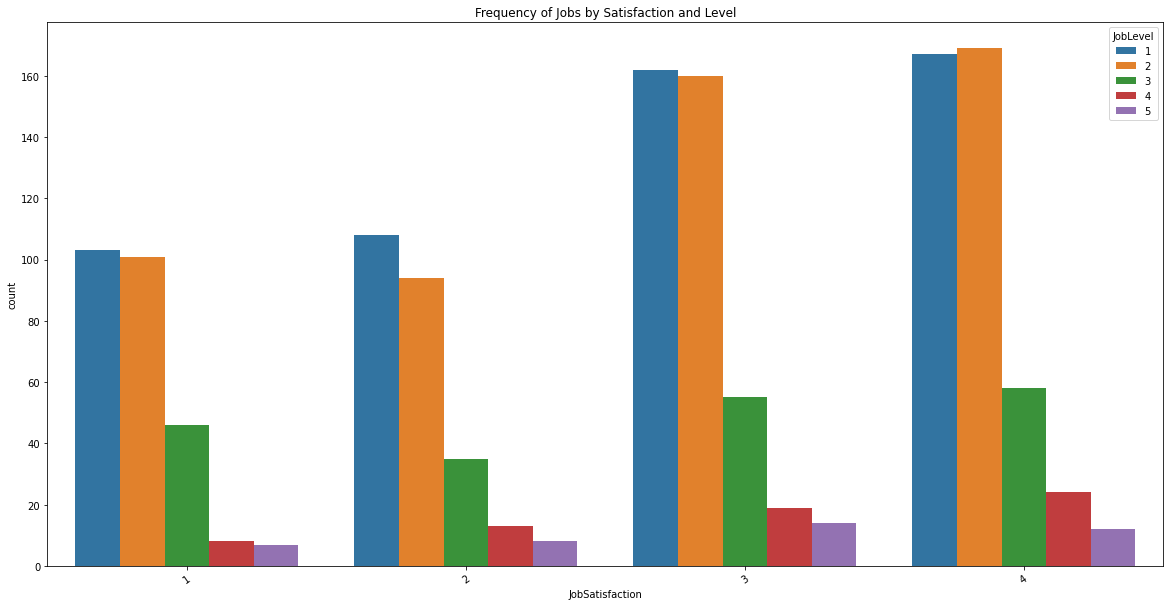

In [184]:
### create a count plot to show the job levels by job role 

plt.figure(figsize=(20,10))

sns.countplot(data = df3, x = "JobSatisfaction", hue = "JobLevel")

plt.xticks(rotation = 35)
plt.title('Frequency of Jobs by Satisfaction and Level')

## Looks evenly spread

<AxesSubplot:>

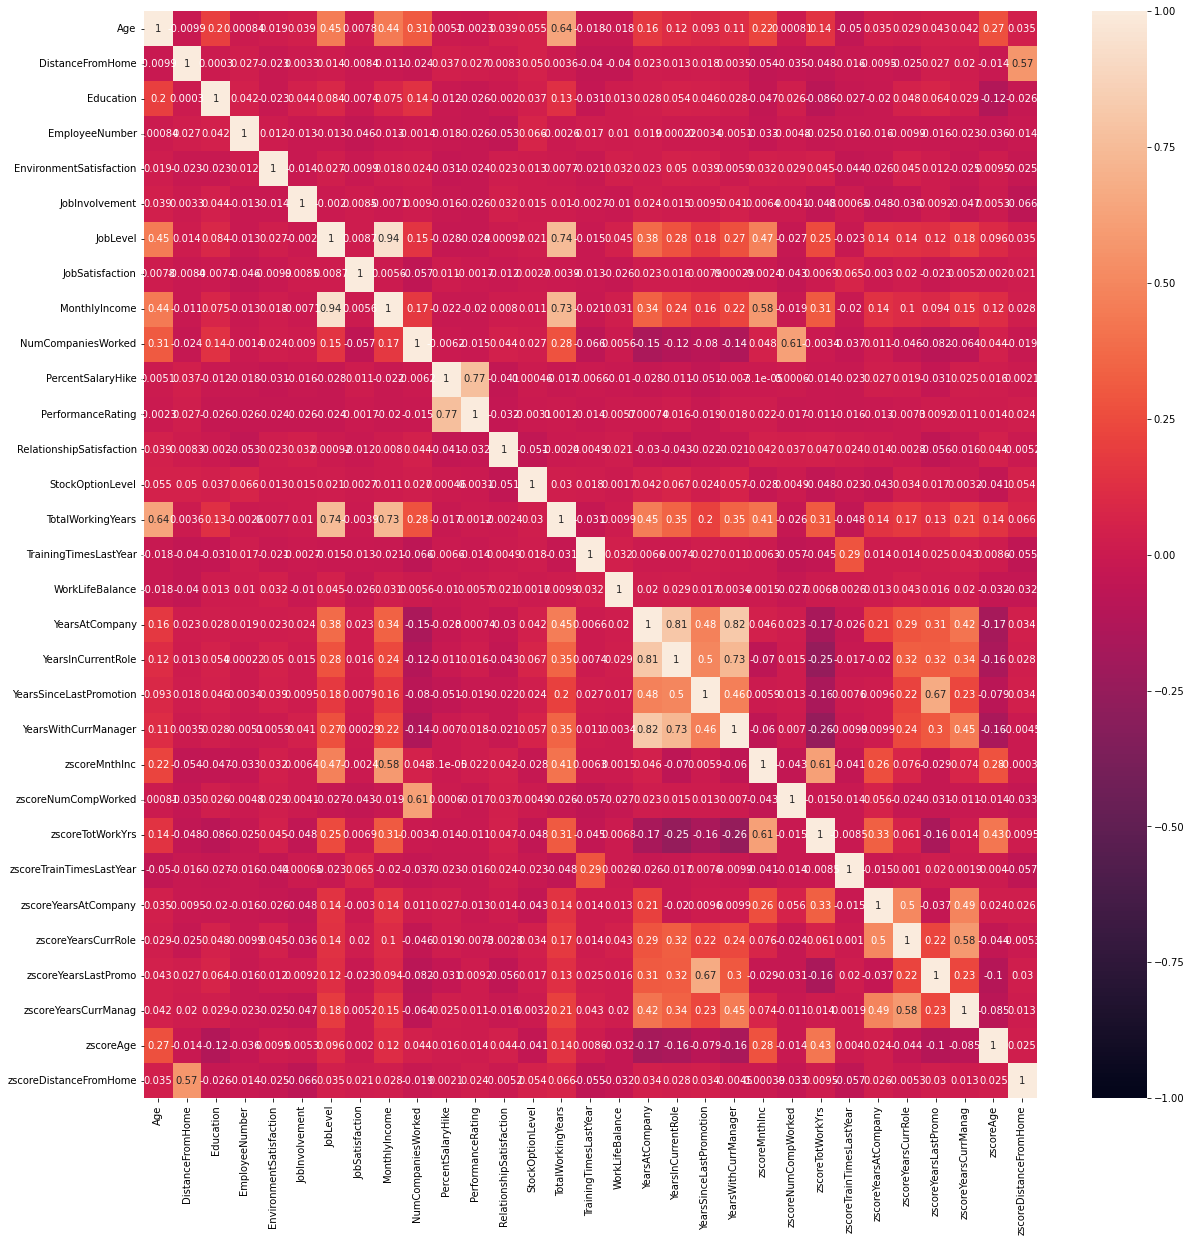

In [164]:
# show correlation of stats via heatmap
plt.figure(figsize=(20,20))

# calculate the correlation matrix for the numeric dataset 
corr = df3.corr()

# plot a heat map to show the magnitude of the correlation between variables
sns.heatmap(corr, vmin = -1, annot = True)

In [88]:
# 8. MONTHLY INCOME vs. Attrition WITH OUTLIERS
df["MonthlyIncome"].groupby(df["Attrition"]).mean()

## Lower income leaving

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64

In [89]:
# 8. MONTHLY INCOME vs. Attrition
df3["MonthlyIncome"].groupby(df3["Attrition"]).mean()

## Lower income leaving

Attrition
No     6221.437500
Yes    4419.422907
Name: MonthlyIncome, dtype: float64

In [90]:
# 8. MONTHLY INCOME vs. Attrition WITH OUTLIERS
df["MonthlyIncome"].groupby(df["Attrition"]).median()

## Lower income leaving

Attrition
No     5204.0
Yes    3202.0
Name: MonthlyIncome, dtype: float64

In [91]:
# 8. MONTHLY INCOME vs. Attrition
df3["MonthlyIncome"].groupby(df3["Attrition"]).median()

## Lower income leaving

Attrition
No     4907.5
Yes    3102.0
Name: MonthlyIncome, dtype: float64

In [210]:
# creating bins for monthly income

bins = [0,2000,4000,6000,8000,10000,12000,14000,20000]

incomeLevels = ["999 - $1,999",
                "$2,000 - $3,999",
                "$4,000 - $5,999",
                "$5,000 - $7,999",
                "$8,000 - $9,999",
                "$10,000 - $11,999",
                "$12,000 - $13,999",
                "$14,000 - $19,999"]

df3["IncomeLevels"] = pd.cut(df3["MonthlyIncome"], bins, labels = incomeLevels)
df3

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscoreMnthInc,zscoreNumCompWorked,zscoreTotWorkYrs,zscoreTrainTimesLastYear,zscoreYearsAtCompany,zscoreYearsCurrRole,zscoreYearsLastPromo,zscoreYearsCurrManag,zscoreAge,zscoreDistanceFromHome,Income Levels,Attrition1,IncomeLevels
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.108350,2.125136,0.421642,2.183601,0.149908,0.029817,0.682043,0.376885,0.542377,1.013523,"$4,000 - $5,999",1,"$4,000 - $5,999"
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0.291719,0.678049,0.164511,0.151498,0.529116,0.817290,0.338836,0.986127,1.443500,0.147732,"$4,000 - $5,999",0,"$4,000 - $5,999"
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.937654,1.324226,0.550208,0.151498,1.168445,1.159292,0.682043,1.146220,0.091815,0.889839,"$2,000 - $3,999",1,"$2,000 - $3,999"
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.763634,0.678049,0.421642,0.151498,0.189604,0.817290,0.347580,1.146220,0.358747,0.766154,"$2,000 - $3,999",0,"$2,000 - $3,999"
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0.644858,2.525591,0.678774,0.151498,0.828933,0.594554,0.004372,0.536978,1.034590,0.889839,"$2,000 - $3,999",0,"$2,000 - $3,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,4,2,Laboratory Technician,4,Married,2571,4,Y,No,17,3,3,1,17,3,3,5,2,0,3,0.835451,0.523316,0.735447,0.151498,0.319664,0.594554,0.682043,0.232357,0.020826,1.707536,"$2,000 - $3,999",0,"$2,000 - $3,999"
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,2,3,Healthcare Representative,1,Married,9991,4,Y,No,15,3,1,1,9,5,3,7,7,1,7,0.741140,0.523316,0.293077,1.708230,0.019848,0.817290,0.338836,0.986127,0.317096,0.395101,"$8,000 - $9,999",0,"$8,000 - $9,999"
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,4,2,Manufacturing Director,2,Married,6142,1,Y,Yes,20,4,2,1,6,0,3,6,2,0,3,0.076690,0.678049,0.678774,2.183601,0.149908,0.594554,0.682043,0.232357,1.034590,0.642470,"$5,000 - $7,999",0,"$5,000 - $7,999"
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,2,2,Sales Executive,2,Married,5390,2,Y,No,14,3,4,0,17,3,2,9,6,0,8,0.236474,0.277594,0.735447,0.151498,0.359360,0.534921,0.682043,1.290748,1.443500,0.889839,"$4,000 - $5,999",0,"$4,000 - $5,999"


In [211]:
# 8a. MONTHLY INCOME vs. Job Role
pd.crosstab(df3["JobRole"], df3["Income Levels"], margins = True)

## Lower income are Research Scientists, Lab Techs, Sales Reps, and HR

Income Levels,"999 - $1,999","$2,000 - $3,999","$4,000 - $5,999","$5,000 - $7,999","$8,000 - $9,999","$10,000 - $11,999","$12,000 - $13,999","$14,000 - $19,999",All
JobRole,,,,,,,,,
Healthcare Representative,0,1,42,38,18,13,4,0,116
Human Resources,1,31,8,7,3,2,0,0,52
Laboratory Technician,12,190,47,5,0,0,0,0,254
Manager,0,0,0,0,0,8,4,50,62
Manufacturing Director,0,0,60,36,18,16,8,0,138
Research Director,0,0,0,0,0,9,18,36,63
Research Scientist,10,216,57,5,1,0,0,0,289
Sales Executive,0,0,147,76,58,20,5,0,306
Sales Representative,10,69,3,1,0,0,0,0,83


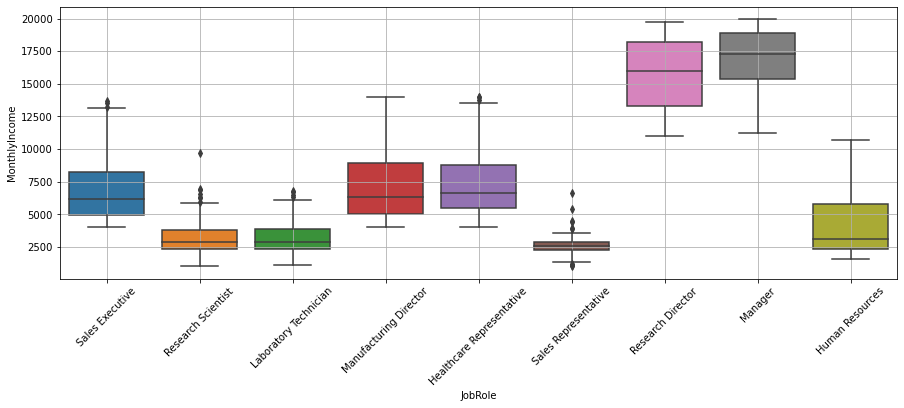

In [212]:
### series of boxplots showing the distribution of income across job roles

plt.figure(figsize=(15,5)) # adjust the size of the output plot

sns.boxplot(x = df3["JobRole"], y = df3["MonthlyIncome"])
plt.xticks(rotation = 45)

plt.grid()

# lowest-paid group is HR, sales, research scientists, and lab techs

In [213]:
# 8b. MONTHLY INCOME vs. Overtime
pd.crosstab(df3["Income Levels"], df3["OverTime"], margins = True)

## Lower income levels associated with overtime

OverTime,No,Yes,All
Income Levels,,,
"999 - $1,999",24,9,33
"$2,000 - $3,999",365,142,507
"$4,000 - $5,999",262,102,364
"$5,000 - $7,999",117,51,168
"$8,000 - $9,999",73,25,98
"$10,000 - $11,999",48,20,68
"$12,000 - $13,999",21,18,39
"$14,000 - $19,999",63,23,86
All,973,390,1363


Text(0.5, 1.0, 'Monthly Income by Job Role and Overtime Eligible')

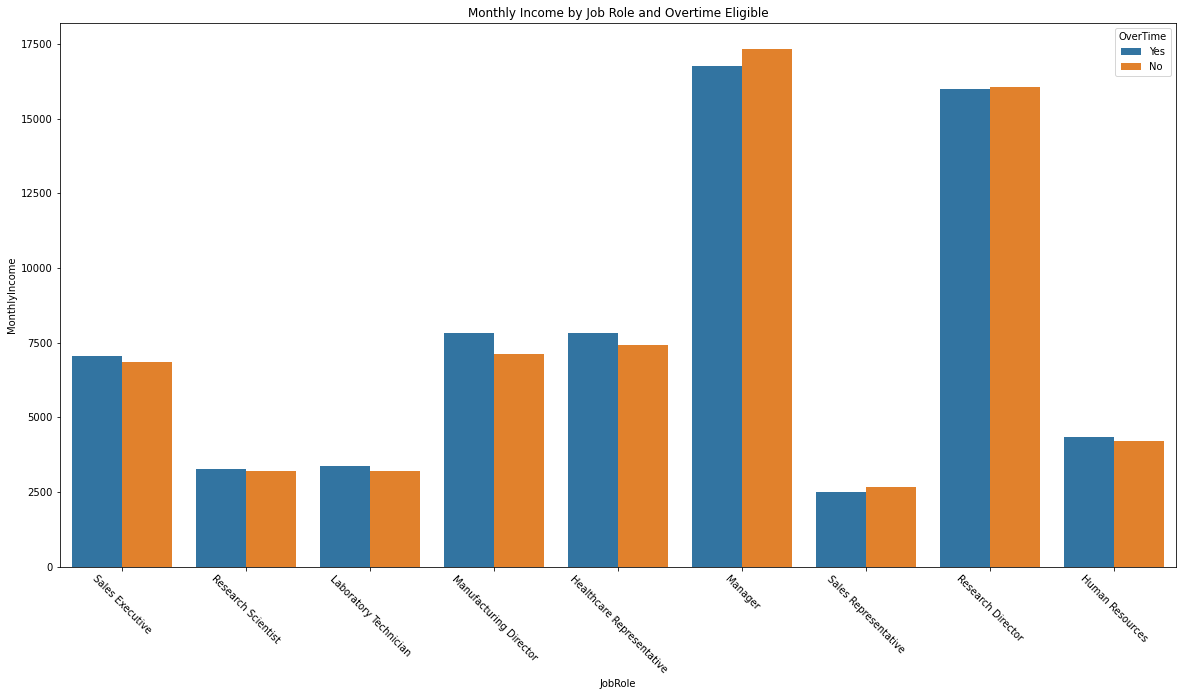

In [214]:
### barplot showing the average attack by pokemon type across stage 

plt.figure(figsize=(20,10))

sns.barplot(data = df, x = "JobRole", y = "MonthlyIncome", hue = "OverTime", ci = None)

plt.xticks(rotation = -45)
plt.title('Monthly Income by Job Role and Overtime Eligible')

# No clear distinctions

In [215]:
# 9. Number Companies Worked vs. Attrition WITH OUTLIERS
df["NumCompaniesWorked"].groupby(df["Attrition"]).mean()

## Insignificant difference

Attrition
No     2.645580
Yes    2.940928
Name: NumCompaniesWorked, dtype: float64

In [216]:
# 9. Number Companies Worked vs. Attrition
df3["NumCompaniesWorked"].groupby(df3["Attrition"]).mean()

## Insignificant difference

Attrition
No     2.628521
Yes    2.938326
Name: NumCompaniesWorked, dtype: float64

In [217]:
# 10. Percent Salary Hike vs. Attrition WITH OUTLIERS
df["PercentSalaryHike"].groupby(df["Attrition"]).mean()

## Insignificant difference

Attrition
No     15.231144
Yes    15.097046
Name: PercentSalaryHike, dtype: float64

In [218]:
# 10. Percent Salary Hike vs. Attrition
df3["PercentSalaryHike"].groupby(df3["Attrition"]).mean()

## Insignificant difference

Attrition
No     15.216549
Yes    15.198238
Name: PercentSalaryHike, dtype: float64

In [219]:
# 11. Performance Rating vs. Attrition WITH OUTLIERS
df["PerformanceRating"].groupby(df["Attrition"]).mean()

## Insignificant difference

Attrition
No     3.153285
Yes    3.156118
Name: PerformanceRating, dtype: float64

In [220]:
# 11. Performance Rating vs. Attrition
df3["PerformanceRating"].groupby(df3["Attrition"]).mean()

## Insignificant difference - dig deeper

Attrition
No     3.148768
Yes    3.162996
Name: PerformanceRating, dtype: float64

In [221]:
# 11. PERFORMANCE RATING vs. Attrition

pd.crosstab(df3["PerformanceRating"], df3["Attrition"], margins = True)

## Insignificant relationship

Attrition,No,Yes,All
PerformanceRating,,,
3,967,190,1157
4,169,37,206
All,1136,227,1363


In [222]:
# 12. RELATIONSHIP SATISFACTION vs. Attrition WITH OUTLIERS
df["RelationshipSatisfaction"].groupby(df["Attrition"]).mean()

## Lower relationship satisfaction leaving

Attrition
No     2.733982
Yes    2.599156
Name: RelationshipSatisfaction, dtype: float64

In [223]:
# 12. RELATIONSHIP SATISFACTION vs. Attrition
df3["RelationshipSatisfaction"].groupby(df3["Attrition"]).mean()

## Lower relationship satisfaction leaving - dig deeper

Attrition
No     2.724472
Yes    2.568282
Name: RelationshipSatisfaction, dtype: float64

In [224]:
# 12. RELATIONSHIP SATISFACTION vs. Attrition

pd.crosstab(df3["RelationshipSatisfaction"], df3["Attrition"], margins = True)

## As relationship satisfaction decreases, likelihood of leaving increases slightly

Attrition,No,Yes,All
RelationshipSatisfaction,,,
1,202,57,259
2,240,43,283
3,363,68,431
4,331,59,390
All,1136,227,1363


In [225]:
# 13. Stock Option Level vs. Attrition WITH OUTLIERS
df["StockOptionLevel"].groupby(df["Attrition"]).mean()

## Lower stock option level leaving

Attrition
No     0.845093
Yes    0.527426
Name: StockOptionLevel, dtype: float64

In [226]:
# 13. Stock Option Level vs. Attrition
df3["StockOptionLevel"].groupby(df3["Attrition"]).mean()

## Lower stock option level leaving

Attrition
No     0.852113
Yes    0.524229
Name: StockOptionLevel, dtype: float64

In [227]:
# 14. Total Working Years vs. Attrition WITH OUTLIERS
df["TotalWorkingYears"].groupby(df["Attrition"]).mean()

## Younger people leaving (coincides with #1)

Attrition
No     11.862936
Yes     8.244726
Name: TotalWorkingYears, dtype: float64

In [228]:
# 14. Total Working Years vs. Attrition
df3["TotalWorkingYears"].groupby(df3["Attrition"]).mean()

## Younger people leaving (coincides with #1)

Attrition
No     10.665493
Yes     7.405286
Name: TotalWorkingYears, dtype: float64

In [229]:
# 15. Trainings vs. Attrition WITH OUTLIERS
df["TrainingTimesLastYear"].groupby(df["Attrition"]).mean()

## Insignificant difference

Attrition
No     2.832928
Yes    2.624473
Name: TrainingTimesLastYear, dtype: float64

In [230]:
# 15. Trainings vs. Attrition
df3["TrainingTimesLastYear"].groupby(df3["Attrition"]).mean()

## Insignificant difference

Attrition
No     2.840669
Yes    2.634361
Name: TrainingTimesLastYear, dtype: float64

In [231]:
# 16. Work-Life Balance vs. Attrition WITH OUTLIERS
df["WorkLifeBalance"].groupby(df["Attrition"]).mean()

## Insignificant difference

Attrition
No     2.781022
Yes    2.658228
Name: WorkLifeBalance, dtype: float64

In [232]:
# 16. Work-Life Balance vs. Attrition
df3["WorkLifeBalance"].groupby(df3["Attrition"]).mean()

## Insignificant difference - dig deeper

Attrition
No     2.780810
Yes    2.669604
Name: WorkLifeBalance, dtype: float64

In [233]:
# 16. Work-Life Balance vs. Attrition

pd.crosstab(df3["WorkLifeBalance"], df3["Attrition"], margins = True)

## As work-life balance decreases, likelihood of leaving increases

Attrition,No,Yes,All
WorkLifeBalance,,,
1,51,23,74
2,263,56,319
3,706,121,827
4,116,27,143
All,1136,227,1363


In [234]:
# 16a. Work-Life Balance vs. Job Role

pd.crosstab(df3["JobRole"], df3["WorkLifeBalance"], margins = True)

## no clear relationship

WorkLifeBalance,1,2,3,4,All
JobRole,,,,,
Healthcare Representative,9,26,70,11,116
Human Resources,4,6,32,10,52
Laboratory Technician,19,56,154,25,254
Manager,4,14,36,8,62
Manufacturing Director,7,33,84,14,138
Research Director,4,12,38,9,63
Research Scientist,16,86,163,24,289
Sales Executive,10,70,193,33,306
Sales Representative,1,16,57,9,83


Text(0.5, 1.0, 'Work-Life Balance by Job Role and Job Level')

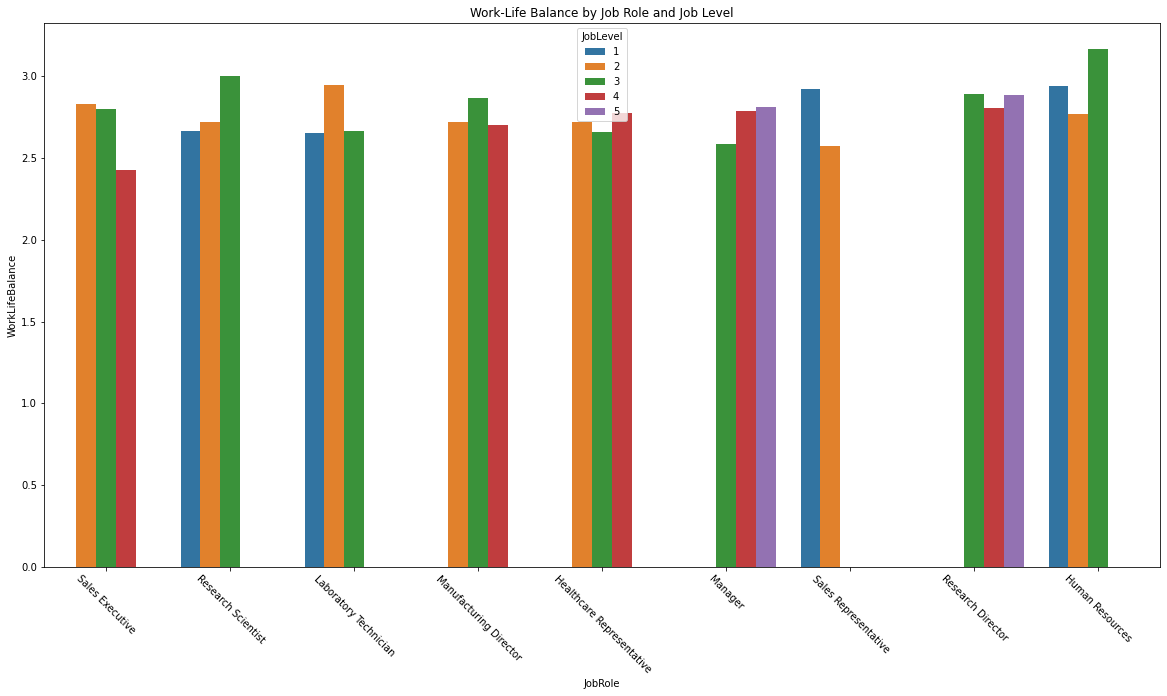

In [235]:
### barplot showing work-life balance by job role and job level

plt.figure(figsize=(20,10))

sns.barplot(data = df, x = "JobRole", y = "WorkLifeBalance", hue = "JobLevel", ci = None)

plt.xticks(rotation = -45)
plt.title('Work-Life Balance by Job Role and Job Level')

### Looks pretty even, with some explainable differences

In [236]:
# 17. YEARS AT COMPANY vs. Attrition WITH OUTLIERS
df["YearsAtCompany"].groupby(df["Attrition"]).mean()

## Fewer years at company leaving

Attrition
No     7.369019
Yes    5.130802
Name: YearsAtCompany, dtype: float64

In [237]:
# 17. YEARS AT COMPANY vs. Attrition
df3["YearsAtCompany"].groupby(df3["Attrition"]).mean()

## Fewer years at company leaving

Attrition
No     6.212148
Yes    4.251101
Name: YearsAtCompany, dtype: float64

In [238]:
# 18. YEARS IN CURRENT ROLE vs. Attrition WITH OUTLIERS
df["YearsInCurrentRole"].groupby(df["Attrition"]).mean()

## Fewer years in current role leaving

Attrition
No     4.484185
Yes    2.902954
Name: YearsInCurrentRole, dtype: float64

In [239]:
# 18. YEARS IN CURRENT ROLE vs. Attrition
df3["YearsInCurrentRole"].groupby(df3["Attrition"]).mean()

## Fewer years in current role leaving

Attrition
No     4.021127
Yes    2.607930
Name: YearsInCurrentRole, dtype: float64

In [240]:
# 19. Years Since Last Promotion vs. Attrition WITH OUTLIERS
df["YearsSinceLastPromotion"].groupby(df["Attrition"]).mean()

## Fewer years since last promotion leaving (moderate difference)

Attrition
No     2.234388
Yes    1.945148
Name: YearsSinceLastPromotion, dtype: float64

In [241]:
# 19. Years Since Last Promotion vs. Attrition
df3["YearsSinceLastPromotion"].groupby(df3["Attrition"]).mean()

## Insignificant difference

Attrition
No     1.678697
Yes    1.528634
Name: YearsSinceLastPromotion, dtype: float64

In [242]:
# 20. YEARS WITH CURRENT MANAGER vs. Attrition WITH OUTLIERS
df["YearsWithCurrManager"].groupby(df["Attrition"]).mean()

## Fewer years with current manager leaving

Attrition
No     4.367397
Yes    2.852321
Name: YearsWithCurrManager, dtype: float64

In [243]:
# 20. YEARS WITH CURRENT MANAGER vs. Attrition
df3["YearsWithCurrManager"].groupby(df3["Attrition"]).mean()

## Fewer years with current manager leaving

Attrition
No     3.926056
Yes    2.581498
Name: YearsWithCurrManager, dtype: float64

In [244]:
# 21. Business Travel vs. Attrition WITH OUTLIERS
pd.crosstab(df["BusinessTravel"], df["Attrition"], margins = True)

## No significant relationship

Attrition,No,Yes,All
BusinessTravel,,,
Non-Travel,138,12,150
Travel_Frequently,208,69,277
Travel_Rarely,887,156,1043
All,1233,237,1470


In [245]:
# 21. Business Travel vs. Attrition
pd.crosstab(df3["BusinessTravel"], df3["Attrition"], margins = True)

## No significant relationship

Attrition,No,Yes,All
BusinessTravel,,,
Non-Travel,128,12,140
Travel_Frequently,192,66,258
Travel_Rarely,816,149,965
All,1136,227,1363


In [246]:
# 22. Department vs. Attrition WITH OUTLIERS
pd.crosstab(df["Department"], df["Attrition"], margins = True)

## HR, Sales more likely to leave

Attrition,No,Yes,All
Department,,,
Human Resources,51,12,63
Research & Development,828,133,961
Sales,354,92,446
All,1233,237,1470


In [247]:
# 22. Department vs. Attrition
pd.crosstab(df3["Department"], df3["Attrition"], margins = True)

## HR, Sales more likely to leave

Attrition,No,Yes,All
Department,,,
Human Resources,46,12,58
Research & Development,768,127,895
Sales,322,88,410
All,1136,227,1363


In [248]:
# 23. Education Field vs. Attrition WITH OUTLIERS
pd.crosstab(df["EducationField"], df["Attrition"], margins = True)

## HR, Marketing, Technical Degree all have above 30% attrition rate, approximately double that of other fields

Attrition,No,Yes,All
EducationField,,,
Human Resources,20,7,27
Life Sciences,517,89,606
Marketing,124,35,159
Medical,401,63,464
Other,71,11,82
Technical Degree,100,32,132
All,1233,237,1470


In [249]:
# 23. Education Field vs. Attrition
pd.crosstab(df3["EducationField"], df3["Attrition"], margins = True)

## HR, Marketing, Technical Degree all have above 30% attrition rate, approximately double that of other fields

Attrition,No,Yes,All
EducationField,,,
Human Resources,18,7,25
Life Sciences,476,83,559
Marketing,113,34,147
Medical,368,62,430
Other,68,11,79
Technical Degree,93,30,123
All,1136,227,1363


In [250]:
# 24. Gender vs. Attrition WITH OUTLIERS
pd.crosstab(df["Gender"], df["Attrition"], margins = True)

## No significant relationship

Attrition,No,Yes,All
Gender,,,
Female,501,87,588
Male,732,150,882
All,1233,237,1470


In [251]:
# 24. Gender vs. Attrition
pd.crosstab(df3["Gender"], df3["Attrition"], margins = True)

## No significant relationship

Attrition,No,Yes,All
Gender,,,
Female,460,82,542
Male,676,145,821
All,1136,227,1363


In [252]:
# 25. Job Role vs. Attrition WITH OUTLIERS
pd.crosstab(df["JobRole"], df["Attrition"], margins = True)

## HR (30%), Lab Techs (31%), and Sales Reps (66%) are leaving at much higher rates than others

Attrition,No,Yes,All
JobRole,,,
Healthcare Representative,122,9,131
Human Resources,40,12,52
Laboratory Technician,197,62,259
Manager,97,5,102
Manufacturing Director,135,10,145
Research Director,78,2,80
Research Scientist,245,47,292
Sales Executive,269,57,326
Sales Representative,50,33,83


In [253]:
# 25. Job Role vs. Attrition
pd.crosstab(df3["JobRole"], df3["Attrition"], margins = True)

## HR (30%), Lab Techs (31%), and Sales Reps (66%) are leaving at much higher rates than others

Attrition,No,Yes,All
JobRole,,,
Healthcare Representative,109,7,116
Human Resources,40,12,52
Laboratory Technician,193,61,254
Manager,58,4,62
Manufacturing Director,129,9,138
Research Director,63,0,63
Research Scientist,242,47,289
Sales Executive,252,54,306
Sales Representative,50,33,83


In [254]:
# 26. Marital Status vs. Attrition WITH OUTLIERS
pd.crosstab(df["MaritalStatus"], df["Attrition"], margins = True)

## Single people much more likely to leave (probably due to age)

Attrition,No,Yes,All
MaritalStatus,,,
Divorced,294,33,327
Married,589,84,673
Single,350,120,470
All,1233,237,1470


In [255]:
# 26. Marital Status vs. Attrition
pd.crosstab(df3["MaritalStatus"], df3["Attrition"], margins = True)

## Single people much more likely to leave (probably due to age)

Attrition,No,Yes,All
MaritalStatus,,,
Divorced,267,32,299
Married,544,78,622
Single,325,117,442
All,1136,227,1363


In [256]:
# 27. Over 18 vs. Attrition WITH OUTLIERS
pd.crosstab(df["Over18"], df["Attrition"], margins = True)

## Nothing to see here, folks

Attrition,No,Yes,All
Over18,,,
Y,1233,237,1470
All,1233,237,1470


In [257]:
# 28. Overtime Eligibility vs. Attrition WITH OUTLIERS
pd.crosstab(df["OverTime"], df["Attrition"], margins = True)

## People eligible to work overtime (aka wage workers) MUCH more likely to leave

Attrition,No,Yes,All
OverTime,,,
No,944,110,1054
Yes,289,127,416
All,1233,237,1470


In [258]:
# 28. Overtime Eligibility vs. Attrition
pd.crosstab(df3["OverTime"], df3["Attrition"], margins = True)

## People eligible to work overtime (aka wage workers) MUCH more likely to leave

Attrition,No,Yes,All
OverTime,,,
No,871,102,973
Yes,265,125,390
All,1136,227,1363


In [259]:
# 28a. Overtime Eligibility vs. Attrition
pd.crosstab(df3["Income Levels"], df3["OverTime"], margins = True)

## People eligible to work overtime (aka wage workers) MUCH more likely to leave

OverTime,No,Yes,All
Income Levels,,,
"999 - $1,999",24,9,33
"$2,000 - $3,999",365,142,507
"$4,000 - $5,999",262,102,364
"$5,000 - $7,999",117,51,168
"$8,000 - $9,999",73,25,98
"$10,000 - $11,999",48,20,68
"$12,000 - $13,999",21,18,39
"$14,000 - $19,999",63,23,86
All,973,390,1363


In [260]:
df3["Attrition1"] = np.where(df3["Attrition"] =="Yes", 1, 0)
df3

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscoreMnthInc,zscoreNumCompWorked,zscoreTotWorkYrs,zscoreTrainTimesLastYear,zscoreYearsAtCompany,zscoreYearsCurrRole,zscoreYearsLastPromo,zscoreYearsCurrManag,zscoreAge,zscoreDistanceFromHome,Income Levels,Attrition1,IncomeLevels
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.108350,2.125136,0.421642,2.183601,0.149908,0.029817,0.682043,0.376885,0.542377,1.013523,"$4,000 - $5,999",1,"$4,000 - $5,999"
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0.291719,0.678049,0.164511,0.151498,0.529116,0.817290,0.338836,0.986127,1.443500,0.147732,"$4,000 - $5,999",0,"$4,000 - $5,999"
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.937654,1.324226,0.550208,0.151498,1.168445,1.159292,0.682043,1.146220,0.091815,0.889839,"$2,000 - $3,999",1,"$2,000 - $3,999"
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.763634,0.678049,0.421642,0.151498,0.189604,0.817290,0.347580,1.146220,0.358747,0.766154,"$2,000 - $3,999",0,"$2,000 - $3,999"
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0.644858,2.525591,0.678774,0.151498,0.828933,0.594554,0.004372,0.536978,1.034590,0.889839,"$2,000 - $3,999",0,"$2,000 - $3,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,4,2,Laboratory Technician,4,Married,2571,4,Y,No,17,3,3,1,17,3,3,5,2,0,3,0.835451,0.523316,0.735447,0.151498,0.319664,0.594554,0.682043,0.232357,0.020826,1.707536,"$2,000 - $3,999",0,"$2,000 - $3,999"
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,2,3,Healthcare Representative,1,Married,9991,4,Y,No,15,3,1,1,9,5,3,7,7,1,7,0.741140,0.523316,0.293077,1.708230,0.019848,0.817290,0.338836,0.986127,0.317096,0.395101,"$8,000 - $9,999",0,"$8,000 - $9,999"
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,4,2,Manufacturing Director,2,Married,6142,1,Y,Yes,20,4,2,1,6,0,3,6,2,0,3,0.076690,0.678049,0.678774,2.183601,0.149908,0.594554,0.682043,0.232357,1.034590,0.642470,"$5,000 - $7,999",0,"$5,000 - $7,999"
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,2,2,Sales Executive,2,Married,5390,2,Y,No,14,3,4,0,17,3,2,9,6,0,8,0.236474,0.277594,0.735447,0.151498,0.359360,0.534921,0.682043,1.290748,1.443500,0.889839,"$4,000 - $5,999",0,"$4,000 - $5,999"


0    1136
1     227
Name: Attrition1, dtype: int64


<AxesSubplot:xlabel='Attrition1', ylabel='count'>

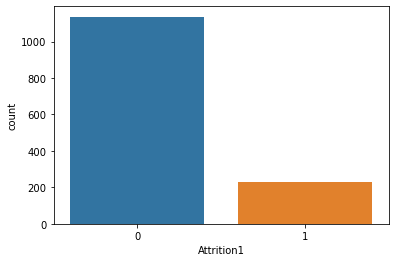

In [261]:
## check the coding of the dependent variable
## the value coded as "1" represents attrition

###

print(df3["Attrition1"].value_counts())

###

sns.countplot(data = df3, x = "Attrition1")

Attrition1
0    6221.437500
1    4419.422907
Name: MonthlyIncome, dtype: float64


<AxesSubplot:xlabel='Attrition1', ylabel='MonthlyIncome'>

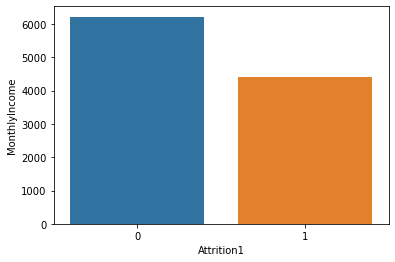

In [262]:
print(df3["MonthlyIncome"].groupby(df3["Attrition1"]).mean())

###

sns.barplot(data = df3, x = "Attrition1", y = "MonthlyIncome", ci = None)

In [263]:
#  create the logistic model to predict attrition based on monthly income, age, job level, and overtime

mod1 = sm.logit('Attrition1 ~ MonthlyIncome + Age + JobLevel + OverTime', data=df3).fit()

mod1.summary()

## LLR p-value indicates a very good model

Optimization terminated successfully.
         Current function value: 0.394610
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Attrition1   No. Observations:                 1363
Model:                          Logit   Df Residuals:                     1358
Method:                           MLE   Df Model:                            4
Date:                Sun, 26 Jun 2022   Pseudo R-squ.:                  0.1238
Time:                        18:19:54   Log-Likelihood:                -537.85
converged:                       True   LL-Null:                       -613.85
Covariance Type:            nonrobust   LLR p-value:                 7.637e-32
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0664      0.345     -0.192      0.847      -0.743       0.610
OverTime[T.Yes]     1.4974      0.157      9.552      0.000       1.190       1.805
MonthlyIncome   -4.709e-05   6.12e-05     -0.769      0.442      -0.000    7.29e-05
Age                -0.0368      0.010     -3.578      0.000      -0.057      -0.017
JobLevel           -0.3382      0.238     -1.418      0.156      -0.806       0.129
===================================================================================
"""

In [266]:
#  create the logistic model to predict attrition based on monthly income, age, job level, and overtime

mod2 = sm.logit('Attrition1 ~ IncomeLevels + Age + JobLevel + OverTime', data=df3).fit()

mod2.summary()

## LLR p-value and variable p-values indicate a very good model

Optimization terminated successfully.
         Current function value: 0.385263
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Attrition1   No. Observations:                 1363
Model:                          Logit   Df Residuals:                     1352
Method:                           MLE   Df Model:                           10
Date:                Sun, 26 Jun 2022   Pseudo R-squ.:                  0.1446
Time:                        18:53:31   Log-Likelihood:                -525.11
converged:                       True   LL-Null:                       -613.85
Covariance Type:            nonrobust   LLR p-value:                 7.866e-33
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.7529      0.509      1.480      0.139      -0.244       1.750
IncomeLevels[T.$2,000 - $3,999]      -1.2975      0.395     -3.283      0.001      -2.072      -0.523
IncomeLevels[T.$4,000 - $5,999]      -1.9386      0.484     -4.005      0.000      -2.887      -0.990
IncomeLevels[T.$5,000 - $7,999]      -1.9981      0.565     -3.535      0.000      -3.106      -0.890
IncomeLevels[T.$8,000 - $9,999]      -1.3950      0.647     -2.155      0.031      -2.664      -0.126
IncomeLevels[T.$10,000 - $11,999]    -1.1245      0.753     -1.492      0.136      -2.601       0.352
IncomeLevels[T.$12,000 - $13,999]    -2.1965      0.973     -2.257      0.024      -4.104      -0.289
IncomeLevels[T.$14,000 - $19,999]    -2.8028      1.241     -2.258      0.024      -5.236      -0.370
OverTime[T.Yes]                       1.5478      0.160      9.649      0.000       1.233       1.862
Age                                  -0.0300      0.010     -2.864      0.004      -0.051      -0.009
JobLevel                             -0.2100      0.275     -0.765      0.444      -0.748       0.328
=====================================================================================================
"""

# REGRESSION MODEL

In [267]:
#  create the logistic model to predict attrition based on income levels, age, job level, and overtime

mod3 = sm.logit('Attrition1 ~ IncomeLevels + Age + OverTime', data=df3).fit()

mod3.summary()

## LLR p-value and variable p-values indicate a very good model

Optimization terminated successfully.
         Current function value: 0.385479
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Attrition1   No. Observations:                 1363
Model:                          Logit   Df Residuals:                     1353
Method:                           MLE   Df Model:                            9
Date:                Sun, 26 Jun 2022   Pseudo R-squ.:                  0.1441
Time:                        18:53:48   Log-Likelihood:                -525.41
converged:                       True   LL-Null:                       -613.85
Covariance Type:            nonrobust   LLR p-value:                 2.273e-33
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.5704      0.449      1.271      0.204      -0.309       1.450
IncomeLevels[T.$2,000 - $3,999]      -1.3001      0.395     -3.288      0.001      -2.075      -0.525
IncomeLevels[T.$4,000 - $5,999]      -2.1178      0.425     -4.988      0.000      -2.950      -1.286
IncomeLevels[T.$5,000 - $7,999]      -2.2426      0.468     -4.787      0.000      -3.161      -1.324
IncomeLevels[T.$8,000 - $9,999]      -1.7246      0.486     -3.549      0.000      -2.677      -0.772
IncomeLevels[T.$10,000 - $11,999]    -1.5289      0.537     -2.850      0.004      -2.581      -0.477
IncomeLevels[T.$12,000 - $13,999]    -2.6806      0.743     -3.606      0.000      -4.138      -1.223
IncomeLevels[T.$14,000 - $19,999]    -3.5036      0.844     -4.152      0.000      -5.157      -1.850
OverTime[T.Yes]                       1.5516      0.160      9.676      0.000       1.237       1.866
Age                                  -0.0312      0.010     -2.999      0.003      -0.052      -0.011
=====================================================================================================
"""

In [272]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_odds = pd.DataFrame(np.exp(mod3.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_odds["pvalue"] = mod3.pvalues

## determine if significant or not

df3_odds["Sig"] = np.where(df3_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

df3_odds

,OR,pvalue,Sig
Intercept,1.768987,2.037146e-01,Not Sig
"IncomeLevels[T.$2,000 - $3,999]",0.272500,1.008082e-03,Sig
"IncomeLevels[T.$4,000 - $5,999]",0.120295,6.108532e-07,Sig
"IncomeLevels[T.$5,000 - $7,999]",0.106182,1.689829e-06,Sig
"IncomeLevels[T.$8,000 - $9,999]",0.178244,3.867724e-04,Sig
"IncomeLevels[T.$10,000 - $11,999]",0.216768,4.377955e-03,Sig
"IncomeLevels[T.$12,000 - $13,999]",0.068519,3.113708e-04,Sig
"IncomeLevels[T.$14,000 - $19,999]",0.030088,3.292325e-05,Sig
OverTime[T.Yes],4.719028,3.795778e-22,Sig
Age,0.969324,2.705322e-03,Sig


# INTERESTING VISUALS

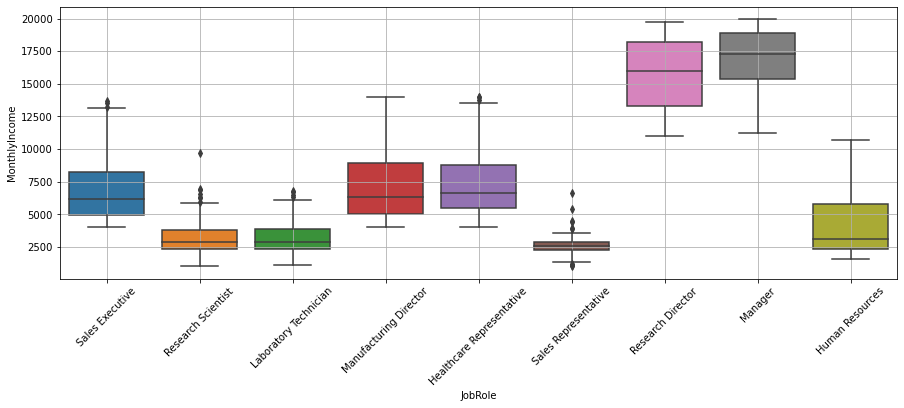

In [284]:
### series of boxplots showing the distribution of income across job roles

plt.figure(figsize=(15,5)) # adjust the size of the output plot

sns.boxplot(x = df3["JobRole"], y = df3["MonthlyIncome"])
plt.xticks(rotation = 45)

plt.grid()

# lowest-paid group is HR, sales, research scientists, and lab techs

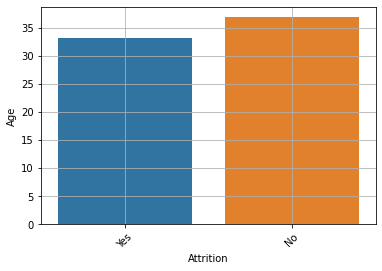

In [292]:
### barplot showing average age by job role

sns.barplot(data = df3, x = "Attrition", y = "Age", ci = None)

plt.xticks(rotation = 45)
plt.title('')

plt.grid()


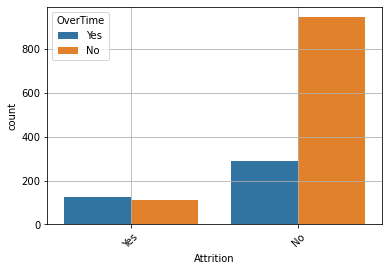

In [293]:
### barplot showing attrition by overtime eligible

sns.countplot(data = df, x = "Attrition", hue = "OverTime")

plt.xticks(rotation = 45)
plt.title('')

plt.grid()